## Tsunami Risk Analysis Using Global Earthquake Data (2001–2022)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("default")


In [2]:
df = pd.read_csv("c:/earthquake-tsunami-risk-analysis\earthquake_data_tsunami.csv")


In [3]:
df.info()
df.isnull().sum()
df.describe()


<class 'pandas.DataFrame'>
RangeIndex: 782 entries, 0 to 781
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   magnitude  782 non-null    float64
 1   cdi        782 non-null    int64  
 2   mmi        782 non-null    int64  
 3   sig        782 non-null    int64  
 4   nst        782 non-null    int64  
 5   dmin       782 non-null    float64
 6   gap        782 non-null    float64
 7   depth      782 non-null    float64
 8   latitude   782 non-null    float64
 9   longitude  782 non-null    float64
 10  Year       782 non-null    int64  
 11  Month      782 non-null    int64  
 12  tsunami    782 non-null    int64  
dtypes: float64(6), int64(7)
memory usage: 79.6 KB


,magnitude,cdi,mmi,sig,nst,dmin,gap,depth,latitude,longitude,Year,Month,tsunami
count,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000
mean,6.941125,4.333760,5.964194,870.108696,230.250639,1.325757,25.038990,75.883199,3.538100,52.609199,2012.280051,6.563939,0.388747
std,0.445514,3.169939,1.462724,322.465367,250.188177,2.218805,24.225067,137.277078,27.303429,117.898886,6.099439,3.507866,0.487778
min,6.500000,0.000000,1.000000,650.000000,0.000000,0.000000,0.000000,2.700000,-61.848400,-179.968000,2001.000000,1.000000,0.000000
25%,6.600000,0.000000,5.000000,691.000000,0.000000,0.000000,14.625000,14.000000,-14.595600,-71.668050,2007.000000,3.250000,0.000000
50%,6.800000,5.000000,6.000000,754.000000,140.000000,0.000000,20.000000,26.295000,-2.572500,109.426000,2013.000000,7.000000,0.000000
75%,7.100000,7.000000,7.000000,909.750000,445.000000,1.863000,30.000000,49.750000,24.654500,148.941000,2017.000000,10.000000,1.000000
max,9.100000,9.000000,9.000000,2910.000000,934.000000,17.654000,239.000000,670.810000,71.631200,179.662000,2022.000000,12.000000,1.000000


### Insight
Some missing values were found in depth and magnitude and were removed during data cleaning.

In [4]:
df.info()
df.columns


<class 'pandas.DataFrame'>
RangeIndex: 782 entries, 0 to 781
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   magnitude  782 non-null    float64
 1   cdi        782 non-null    int64  
 2   mmi        782 non-null    int64  
 3   sig        782 non-null    int64  
 4   nst        782 non-null    int64  
 5   dmin       782 non-null    float64
 6   gap        782 non-null    float64
 7   depth      782 non-null    float64
 8   latitude   782 non-null    float64
 9   longitude  782 non-null    float64
 10  Year       782 non-null    int64  
 11  Month      782 non-null    int64  
 12  tsunami    782 non-null    int64  
dtypes: float64(6), int64(7)
memory usage: 79.6 KB


Index(['magnitude', 'cdi', 'mmi', 'sig', 'nst', 'dmin', 'gap', 'depth',
       'latitude', 'longitude', 'Year', 'Month', 'tsunami'],
      dtype='str')

In [5]:
df.dropna(subset=["magnitude", "depth", "latitude", "longitude", "tsunami"], inplace=True)
df["tsunami"] = df["tsunami"].map({0: "No", 1: "Yes"})



## Time-based Analysis

In [6]:
df["Year"].head()


0    2022
1    2022
2    2022
3    2022
4    2022
Name: Year, dtype: int64

In [7]:
df["magnitude_category"] = pd.cut(
    df["magnitude"],
    bins=[0, 5, 6.5, 8, 10],
    labels=["Low", "Moderate", "High", "Extreme"]
)


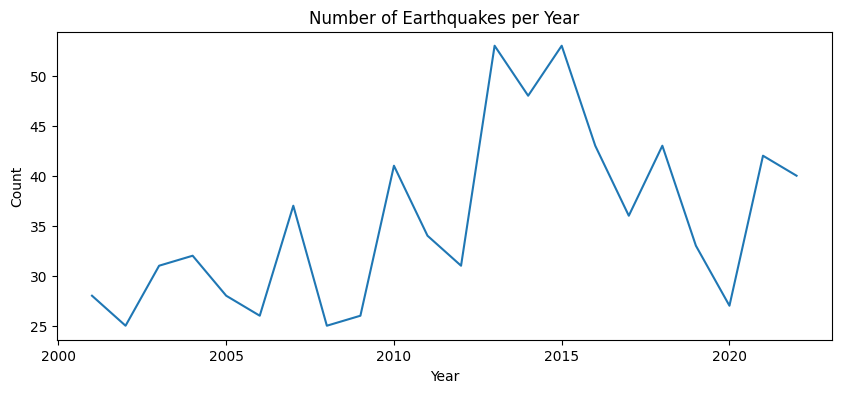

In [8]:
df.groupby("Year").size().plot(figsize=(10,4))
plt.title("Number of Earthquakes per Year")
plt.xlabel("Year")
plt.ylabel("Count")
plt.show()


### Insight  
The number of recorded earthquakes increases over time, showing higher counts in recent years.

In [9]:
df[["magnitude", "magnitude_category"]].head()


,magnitude,magnitude_category
0,7.0,High
1,6.9,High
2,7.0,High
3,7.3,High
4,6.6,High


In [10]:
df["magnitude_category"].value_counts()


magnitude_category
High        628
Moderate    131
Extreme      23
Low           0
Name: count, dtype: int64

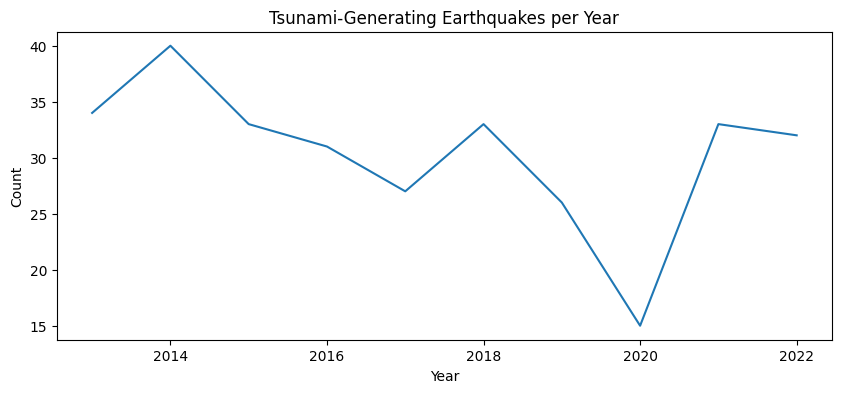

In [11]:
df[df["tsunami"] == "Yes"].groupby("Year").size().plot(figsize=(10,4))
plt.title("Tsunami-Generating Earthquakes per Year")
plt.xlabel("Year")
plt.ylabel("Count")
plt.show()


### Insight
Tsunami events remain relatively rare but show spikes in specific years


## Magnitude Analysis

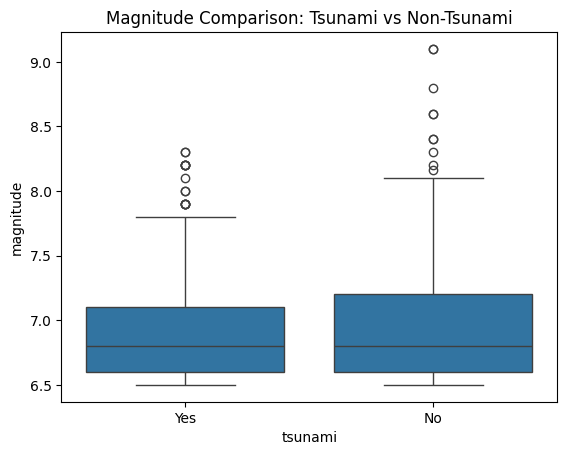

In [12]:
sns.boxplot(x="tsunami", y="magnitude", data=df)
plt.title("Magnitude Comparison: Tsunami vs Non-Tsunami")
plt.show()


### Insight 
Non-tsunami earthquakes show slightly higher magnitudes in this dataset, indicating that high magnitude alone does not guarantee tsunami occurrence.

## Depth Analysis

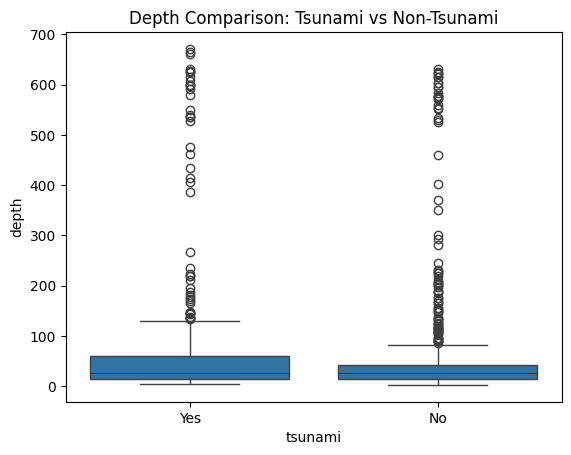

In [13]:
sns.boxplot(x="tsunami", y="depth", data=df)
plt.title("Depth Comparison: Tsunami vs Non-Tsunami")
plt.show() 


### Insight
Although some non-tsunami earthquakes have high magnitudes, tsunami-generating earthquakes tend to occur at shallower depths, indicating that depth also plays an important role.


In [14]:
df[df["magnitude"] >= 8][["Year", "magnitude", "depth", "tsunami"]]


,Year,magnitude,depth,tsunami
56,2021,8.10,22.79,No
59,2021,8.20,46.66,Yes
60,2021,8.20,35.00,Yes
74,2021,8.10,28.93,Yes
129,2019,8.00,122.57,Yes
170,2018,8.20,600.00,Yes
198,2017,8.20,47.39,Yes
285,2015,8.30,22.44,Yes
356,2014,8.20,25.00,Yes
393,2013,8.30,598.10,Yes


### Insight 
Some extreme magnitude earthquakes are associated with tsunami events, but high magnitude alone does not always result in a tsunami.


## Geographic Distribution

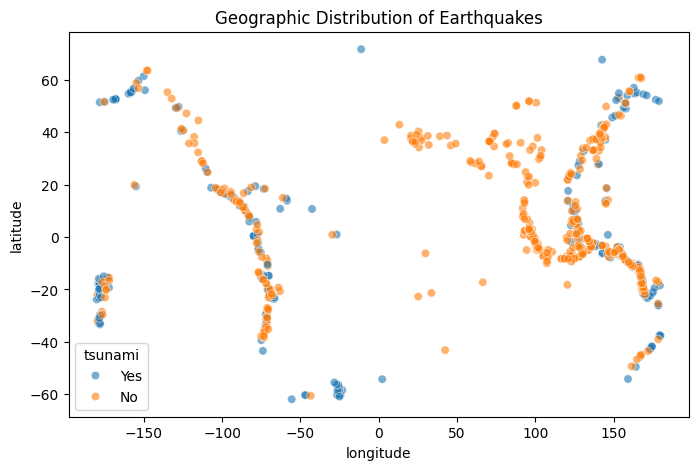

In [15]:
plt.figure(figsize=(8,5))
sns.scatterplot(
    x="longitude",
    y="latitude",
    hue="tsunami",
    data=df,
    alpha=0.6
)
plt.title("Geographic Distribution of Earthquakes")
plt.show()


### Insight 
Tsunami-generating earthquakes are geographically clustered in specific regions.


## Correlation Analysis

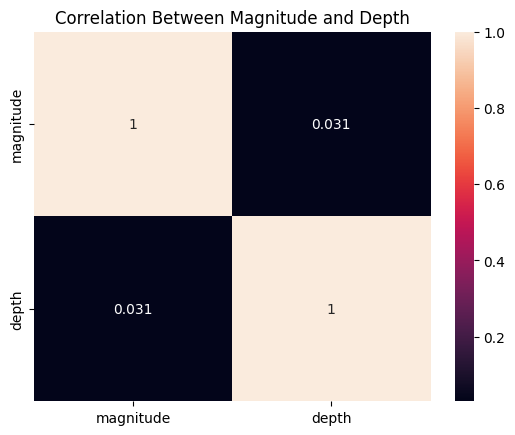

In [16]:
sns.heatmap(df[["magnitude", "depth"]].corr(), annot=True)
plt.title("Correlation Between Magnitude and Depth")
plt.show()


### Insight
Magnitude and depth provide different information about earthquakes, and neither alone is sufficient to explain tsunami occurrence.


## Final Insights
- High magnitude alone does not guarantee tsunami occurrence.
- Shallow earthquakes show higher tsunami association.
- Tsunami events occur in specific geographic zones.
- These findings highlight that tsunami risk depends on multiple factors, not magnitude alone.

